# Image retrieval using deep features

In [3]:
import turicreate
import numpy as np
import matplotlib.pyplot as plt

# Load some CIFAR-10 images

In [6]:
image_data = turicreate.SFrame('Code2/image_train_data/')

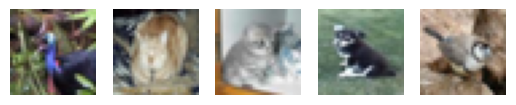

In [23]:
image_show = image_data['image']
for i, img in enumerate(image_show[:5]):
    img = np.array(img.pixel_data)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# Compute deep features from our images

In [24]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_data['deep_features'] = deep_learning_model.extract_features(image_data)

In [25]:
image_data

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Create a nearest neighbors model to retrieve images from deep features

In [26]:
knn_model = turicreate.nearest_neighbors.create(image_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

# Use image retrieval model with deep features to find similar images

In [86]:
cat = image_data[18:19]

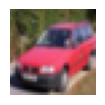

In [87]:
cat_show = cat['image']
plt.subplot(1, 5, i+1)
plt.imshow(img)
plt.axis('off')
plt.show()

In [49]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.415ms      |

| Done         |         | 100         | 205.896ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [50]:
def get_images_from_ids(query_result):
    return image_data.filter_by(query_result['reference_label'],'id')

In [52]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 6.202ms      |

| Done         |         | 100         | 195.542ms    |

+--------------+---------+-------------+--------------+

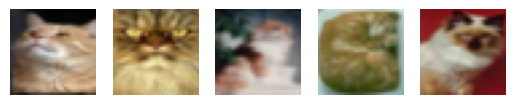

In [65]:
cat_nn_show = cat_neighbors['image']
for i, img in enumerate(cat_nn_show[:5]):
    img = np.array(img.pixel_data)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# Find images similar to a car

In [70]:
car = image_data[8:9]

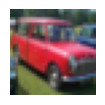

In [71]:
car_nn_show = car['image']
for i, img in enumerate(car_nn_show[:5]):
    img = np.array(img.pixel_data)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.157ms      |

| Done         |         | 100         | 178.674ms    |

+--------------+---------+-------------+--------------+

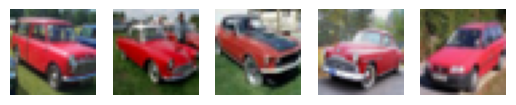

In [73]:
car_nn_get_form_id_show = get_images_from_ids(knn_model.query(car))['image']
for i, img in enumerate(car_nn_get_form_id_show[:5]):
    img = np.array(img.pixel_data)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# Create a function to find and show nearest neighbors to an image

In [80]:
def show_neighbors(i):
    # Obtém as imagens semelhantes usando o modelo KNN
    show_imgs_nn = get_images_from_ids(knn_model.query(image_data[i:i+1]))['image']
    
    # Plota as primeiras 5 imagens
    plt.figure(figsize=(15, 3))
    for j, img in enumerate(show_imgs_nn[:5]):
        img = np.array(img.pixel_data)
        plt.subplot(1, 5, j+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.666ms      |

| Done         |         | 100         | 176.843ms    |

+--------------+---------+-------------+--------------+

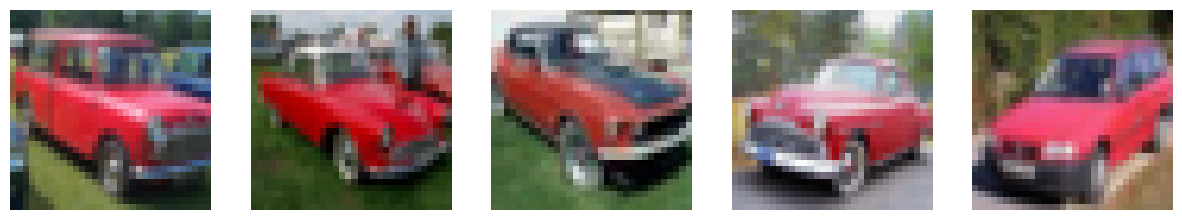

In [81]:
show_neighbors(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.629ms      |

| Done         |         | 100         | 179.015ms    |

+--------------+---------+-------------+--------------+

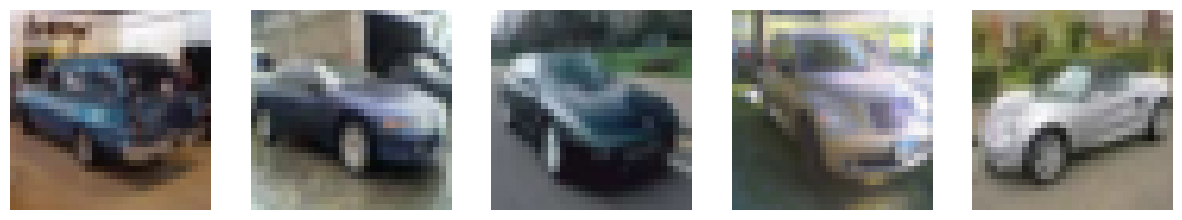

In [82]:
show_neighbors(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 4.327ms      |

| Done         |         | 100         | 201.611ms    |

+--------------+---------+-------------+--------------+

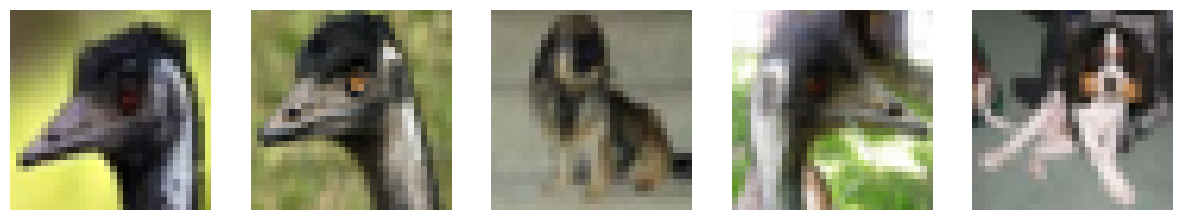

In [83]:
show_neighbors(500)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 4.406ms      |

| Done         |         | 100         | 184.896ms    |

+--------------+---------+-------------+--------------+

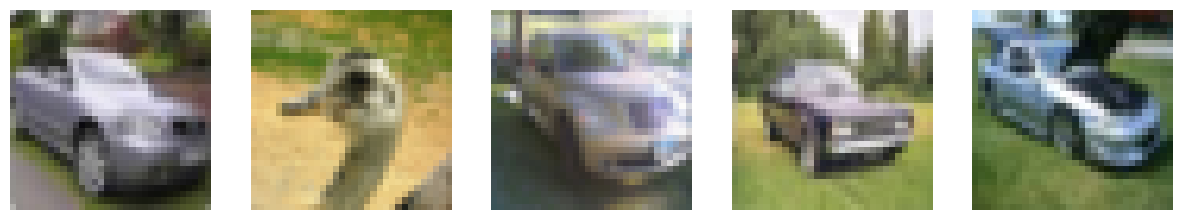

In [84]:
show_neighbors(2000)